<a href="https://colab.research.google.com/github/rosiam2020/Covid19_Amaz-nia/blob/main/aval2_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#)1)  Classificar as variáveis do dataset CARROS
#2) Estimar se as variáveis apresentam distribuição semelhante à Normal
#2a) Caso não apresentem tente transformar os dados utilizando a transformação mais adequada
#2b) caso não seja possivel continue a análise de forma adequada
#3) Com base na resposta utilizar a Análise de Correlação adequada
#4) Selecionar as variáveis que apresentam as correlações (+ e -) mais fortes: Justificar a escolha dessas variáveis
#4a) Realizar regressão linear para essas variáveis
#4b) Gerar gráfico de regressão ( com linha de tendência, se possível)
#4c) Determinar os valores de R2 ( r-quadrado) e do valor de p
#4d) Interpretar o grau de predição dos modelos lineares gerados com base no comportamento da variável dependente em função da variável independente.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plb
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plb.style.use('seaborn')
plb.rc('axes', titlesize=10) 


In [ ]:
aval2 = pd.read_excel ('aval2.xlsx')
aval2.head ()

,Car,Model,Origin,MPG,Cilindros,Cilindradas,Cavalos (potência),Peso,Aceleração
0,Hi 1200D,70,US,9.0,8,304.0,193,4732,18.5
1,Chevy C20,70,US,10.0,8,307.0,200,4376,15.0
2,Ford F250,70,US,10.0,8,360.0,215,4615,14.0
3,Chevrolet Impala,73,US,11.0,8,400.0,150,4997,14.0
4,Dodge D200,70,US,11.0,8,318.0,210,4382,13.5


In [ ]:
#1. Classificar as variáveis do dataset CARROS
#Uma boa forma de iniciar uma análise descritiva adequada é verificar os tipos de de variáveis disponíveis. Variáveis podem ser classificadas da seguinte forma:

#Qualitativas  (Nominais ou Ordinais)
#Quantitativas (Discretas ou Contínuas)

#Resposta:
#Car - qualitativa nominal
#Model	 - qualitativa nominal
#Origin	- qualitativa nominal
#MPG	- quantitativa discreta
#Cilindros	- quatitativa discreta
#Cilindradas- quantitativa contínua
#Cavalos (potência)	 - quantitativa discreta
#Peso	- quantitativa contínua
#Aceleração - quantitativa discreta



In [ ]:
#2) Estimar se as variáveis apresentam distribuição semelhante à Normal
#RESPOSTA: SOMENTE AS VARIÁVEIS CILINDROS E ACELERAÇÃO ( gRÁFICOS A SEGUIR)

In [ ]:
print("Estatísticas descritivas")
aval2.describe()

Estatísticas descritivas


,Model,MPG,Cilindros,Cilindradas,Cavalos (potência),Peso,Aceleração
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,75.979592,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,3.683737,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,70.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,73.000000,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,76.000000,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,79.000000,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,82.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
meanCili=5.471939
meanCilin2=194.411990	
meanCav=104.469388	
meanpeso=2977.584184
meanacel=5.541327
sigma1 = 0.2
sigma2 = 0.5
sigma3 = 0.8
x = np.linspace(0,10,100)

In [ ]:
f1 = (1.0/(sigma1*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCili)/sigma1)**2.0)
f2 = (1.0/(sigma2*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCili)/sigma2)**2.0)
f3 = (1.0/(sigma3*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCili)/sigma3)**2.0)

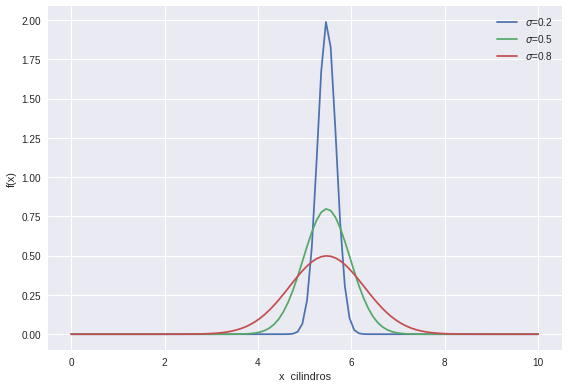

In [ ]:
plt.plot(x,f1,label=r'$\sigma$='+str(sigma1))
plt.plot(x,f2,label=r'$\sigma$='+str(sigma2))
plt.plot(x,f3,label=r'$\sigma$='+str(sigma3))
plt.xlabel('x  cilindros')
plt.ylabel('f(x)')
plt.legend()
plt.tight_layout()

In [ ]:
f1 = (1.0/(sigma1*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCilin2)/sigma1)**2.0)
f2 = (1.0/(sigma2*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCilin2)/sigma2)**2.0)
f3 = (1.0/(sigma3*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCilin2)/sigma3)**2.0)

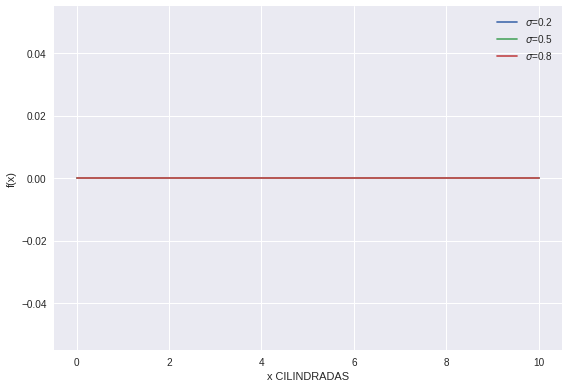

In [ ]:
plt.plot(x,f1,label=r'$\sigma$='+str(sigma1))
plt.plot(x,f2,label=r'$\sigma$='+str(sigma2))
plt.plot(x,f3,label=r'$\sigma$='+str(sigma3))
plt.xlabel('x CILINDRADAS')
plt.ylabel('f(x)')
plt.legend()
plt.tight_layout()

In [ ]:
f1 = (1.0/(sigma1*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCav)/sigma1)**2.0)
f2 = (1.0/(sigma2*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCav)/sigma2)**2.0)
f3 = (1.0/(sigma3*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanCav)/sigma3)**2.0)

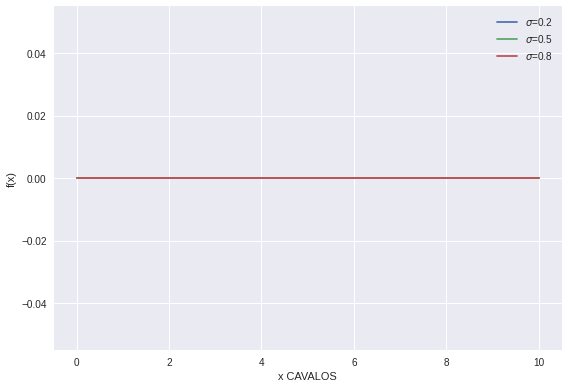

In [ ]:
plt.plot(x,f1,label=r'$\sigma$='+str(sigma1))
plt.plot(x,f2,label=r'$\sigma$='+str(sigma2))
plt.plot(x,f3,label=r'$\sigma$='+str(sigma3))
plt.xlabel('x CAVALOS')
plt.ylabel('f(x)')
plt.legend()
plt.tight_layout()

In [ ]:
f1 = (1.0/(sigma1*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanpeso)/sigma1)**2.0)
f2 = (1.0/(sigma2*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanpeso)/sigma2)**2.0)
f3 = (1.0/(sigma3*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanpeso)/sigma3)**2.0)

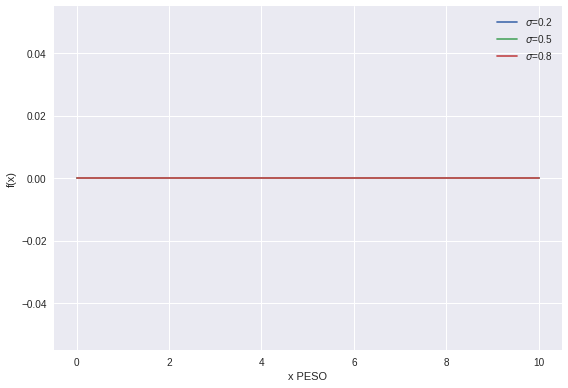

In [ ]:
plt.plot(x,f1,label=r'$\sigma$='+str(sigma1))
plt.plot(x,f2,label=r'$\sigma$='+str(sigma2))
plt.plot(x,f3,label=r'$\sigma$='+str(sigma3))
plt.xlabel('x PESO')
plt.ylabel('f(x)')
plt.legend()
plt.tight_layout()

In [ ]:
f1 = (1.0/(sigma1*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanacel)/sigma1)**2.0)
f2 = (1.0/(sigma2*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanacel)/sigma2)**2.0)
f3 = (1.0/(sigma3*np.sqrt(2.0*math.pi)))*np.exp(-0.5*((x-meanacel)/sigma3)**2.0)

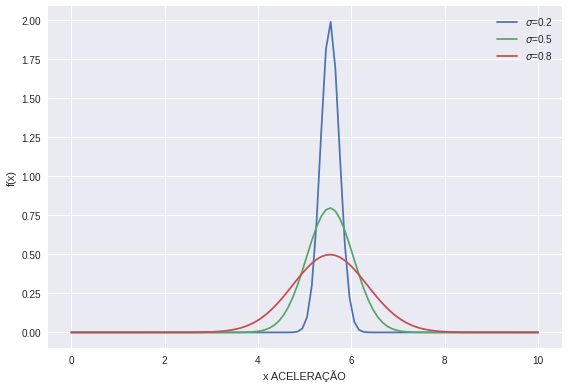

In [ ]:
plt.plot(x,f1,label=r'$\sigma$='+str(sigma1))
plt.plot(x,f2,label=r'$\sigma$='+str(sigma2))
plt.plot(x,f3,label=r'$\sigma$='+str(sigma3))
plt.xlabel('x ACELERAÇÃO')
plt.ylabel('f(x)')
plt.legend()
plt.tight_layout()

In [ ]:
##Com base na resposta utilizar a Análise de Correlação adequada
#4) Selecionar as variáveis que apresentam as correlações (+ e -) mais fortes: Justificar a escolha dessas variáveis
#Resposta: O peso se correlaciona bem com  as variáveis Cilindros, Cilindradas e Cavalos(Potência)
#Matriz de correlação a seguir

In [ ]:
corr_df = aval2.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,Model,MPG,Cilindros,Cilindradas,Cavalos (potência),Peso,Aceleração
Model,1.000000,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316
MPG,0.580541,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
Cilindros,-0.345647,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
Cilindradas,-0.369855,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
Cavalos (potência),-0.416361,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
Peso,-0.309120,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
Aceleração,0.290316,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [ ]:
print("Estatísticas descritivas")
aval2.describe()

Estatísticas descritivas


,Model,MPG,Cilindros,Cilindradas,Cavalos (potência),Peso,Aceleração
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,75.979592,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,3.683737,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,70.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,73.000000,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,76.000000,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,79.000000,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,82.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [ ]:
#4a) Realizar regressão linear para essas variáveis
#4b) Gerar gráfico de regressão ( com linha de tendência, se possível)
#4c) Determinar os valores de R2 ( r-quadrado) e do valor de p
#4d) Interpretar o grau de predição dos modelos lineares gerados com base no comportamento da variável dependente em função da variável independente.

In [ ]:
df = pd.read_excel ('aval2.xlsx')
df.head (4)

,Car,Model,Origin,MPG,Cilindros,Cilindradas,Cavalos (potência),Peso,Aceleração
0,Hi 1200D,70,US,9.0,8,304.0,193,4732,18.5
1,Chevy C20,70,US,10.0,8,307.0,200,4376,15.0
2,Ford F250,70,US,10.0,8,360.0,215,4615,14.0
3,Chevrolet Impala,73,US,11.0,8,400.0,150,4997,14.0


Text(0.5, 0, 'Cilindradas')

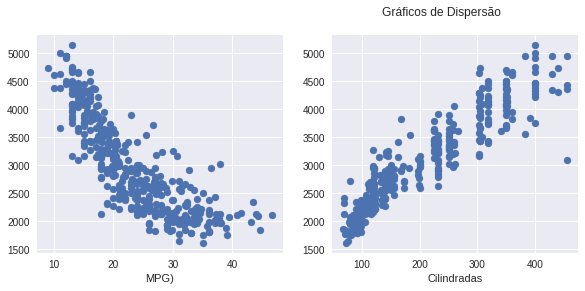

In [ ]:
X = np.array(df["Cilindradas"]).reshape((-1,1))
Y = np.array(df["Peso"])

plb.figure(figsize=(15, 4))
plb.suptitle("Gráficos de Dispersão")
plb.ylabel("Peso")

plb.subplot(131)
plb.scatter(df["MPG"],Y)
plb.xlabel("MPG)")
plb.subplot(132)
plb.scatter(df["Cilindradas"],Y)
plb.xlabel("Cilindradas")


In [ ]:
modelo = sm.OLS(Y, sm.add_constant(X)).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2621.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          3.49e-175
Time:                        22:30:20   Log-Likelihood:                -2799.0
No. Observations:                 392   AIC:                             5602.
Df Residuals:                     390   BIC:                             5610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1505.2673     32.650     46.103      0.0

In [ ]:
sm.stats.anova_lm(ols('Peso ~ Cilindradas', data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Cilindradas,1.0,2.455625e+08,2.455625e+08,2621.084452,3.489084e-175
Residual,390.0,3.653807e+07,9.368735e+04,NaN,NaN


Text(0, 0.5, 'Peso')

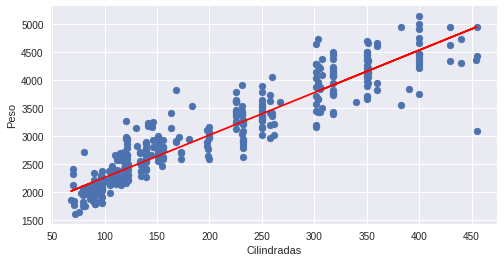

In [ ]:
plb.figure(figsize=(8, 4))
plb.scatter(X,Y)
plb.plot(X, modelo.predict(), color="r")
plb.xlabel("Cilindradas")
plb.ylabel("Peso")

Text(0.5, 0, 'Cilindradas')

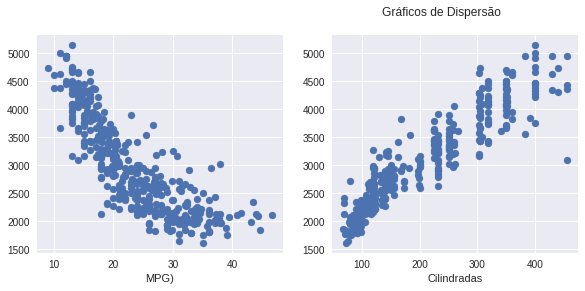

In [ ]:
X = np.array(df["MPG"]).reshape((-1,1))
Y = np.array(df["Peso"])

plb.figure(figsize=(15, 4))
plb.suptitle("Gráficos de Dispersão")
plb.ylabel("Peso")

plb.subplot(131)
plb.scatter(df["MPG"],Y)
plb.xlabel("MPG)")
plb.subplot(132)
plb.scatter(df["Cilindradas"],Y)
plb.xlabel("Cilindradas")

In [ ]:
modelo = sm.OLS(Y, sm.add_constant(X)).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          6.02e-102
Time:                        22:30:45   Log-Likelihood:                -2968.4
No. Observations:                 392   AIC:                             5941.
Df Residuals:                     390   BIC:                             5949.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5101.1136     75.487     67.576      0.0

In [ ]:
sm.stats.anova_lm(ols('Peso ~ MPG', data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
MPG,1.0,1.953914e+08,1.953914e+08,878.830886,6.015296e-102
Residual,390.0,8.670912e+07,2.223311e+05,NaN,NaN


Text(0, 0.5, 'Peso')

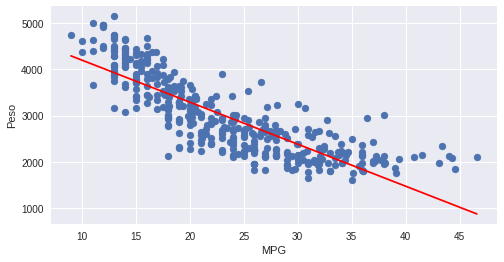

In [ ]:
plb.figure(figsize=(8, 4))
plb.scatter(X,Y)
plb.plot(X, modelo.predict(), color="r")
plb.xlabel("MPG")
plb.ylabel("Peso")